# Loading data

In [1]:
import pandas as pd

text = pd.read_csv('text_final.csv', index_col='SCENE')

# Drop the last 27 columns using .iloc
text = text.iloc[:, :-27]
text.head()

,Embedding_0,Embedding_1,Embedding_2,Embedding_3,Embedding_4,Embedding_5,Embedding_6,Embedding_7,Embedding_8,Embedding_9,...,Embedding_758,Embedding_759,Embedding_760,Embedding_761,Embedding_762,Embedding_763,Embedding_764,Embedding_765,Embedding_766,Embedding_767
SCENE,,,,,,,,,,,,,,,,,,,,,
1_10004,0.400577,-0.735008,-0.096150,-0.285756,-0.357918,-0.051856,1.045135,-0.481453,-0.091696,-0.379449,...,0.231023,0.676469,0.125527,-0.045216,-0.050516,-0.035607,-0.009513,-0.084522,0.603833,0.591911
1_10009,0.387123,-0.837304,-0.077900,-0.247002,-0.358525,-0.089530,1.096665,-0.495899,-0.074850,-0.386238,...,0.299691,0.699883,0.094027,-0.067608,-0.036613,-0.093318,0.002613,-0.112674,0.624801,0.613933
1_1001,0.376343,-0.645923,-0.120487,-0.267022,-0.319736,-0.050790,0.996660,-0.409754,-0.078868,-0.378833,...,0.267513,0.632195,0.140556,-0.138602,-0.057374,-0.059396,-0.009998,-0.095549,0.570483,0.570835
1_1003,0.366896,-0.670176,-0.104165,-0.300600,-0.300686,-0.042529,0.994088,-0.427367,-0.069317,-0.340112,...,0.254599,0.610260,0.107198,-0.092323,-0.042515,-0.088271,-0.008831,-0.111850,0.573721,0.568279
1_10190,0.405070,-0.688916,-0.153265,-0.233106,-0.311845,-0.056022,0.998371,-0.423859,-0.054147,-0.311177,...,0.254542,0.631909,0.132351,-0.105029,-0.070631,-0.131713,-0.016279,-0.082275,0.584081,0.618788


In [2]:
labels = pd.read_csv('labels_final.csv', index_col='SCENE')
labels.head()

,Sarcasm
SCENE,
1_10004,0.0
1_10009,0.0
1_1001,0.0
1_1003,1.0
1_10190,0.0


In [3]:
labels = labels['Sarcasm'].astype(int)

# Neural Network

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

input_dim = 768

# Scale the input features
scaler = StandardScaler()
text_scaled = scaler.fit_transform(text)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(text_scaled, labels, test_size=0.3, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(512, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # binary output 

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=5, min_lr=0.001)

# Add this callback to the list of callbacks
callbacks = [EarlyStopping(monitor='val_accuracy', patience=15), reduce_lr]

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=32, callbacks=callbacks, validation_split=0.1)

# Predict on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Epoch 1/500
24/24 [==============================] - 1s 11ms/step - loss: 1.1656 - accuracy: 0.5304 - val_loss: 0.6818 - val_accuracy: 0.5529 - lr: 0.0010
Epoch 2/500
24/24 [==============================] - 0s 6ms/step - loss: 1.0225 - accuracy: 0.5053 - val_loss: 0.6918 - val_accuracy: 0.5059 - lr: 0.0010
Epoch 3/500
24/24 [==============================] - 0s 6ms/step - loss: 0.8768 - accuracy: 0.5185 - val_loss: 0.6789 - val_accuracy: 0.6353 - lr: 0.0010
Epoch 4/500
24/24 [==============================] - 0s 6ms/step - loss: 0.8256 - accuracy: 0.5595 - val_loss: 0.6767 - val_accuracy: 0.6118 - lr: 0.0010
Epoch 5/500
24/24 [==============================] - 0s 6ms/step - loss: 0.7771 - accuracy: 0.5384 - val_loss: 0.6731 - val_accuracy: 0.5647 - lr: 0.0010
Epoch 6/500
24/24 [==============================] - 0s 6ms/step - loss: 0.7766 - accuracy: 0.5595 - val_loss: 0.6302 - val_accuracy: 0.6824 - lr: 0.0010
Epoch 7/500
24/24 [==============================] - 0s 6ms/step - loss: 0.

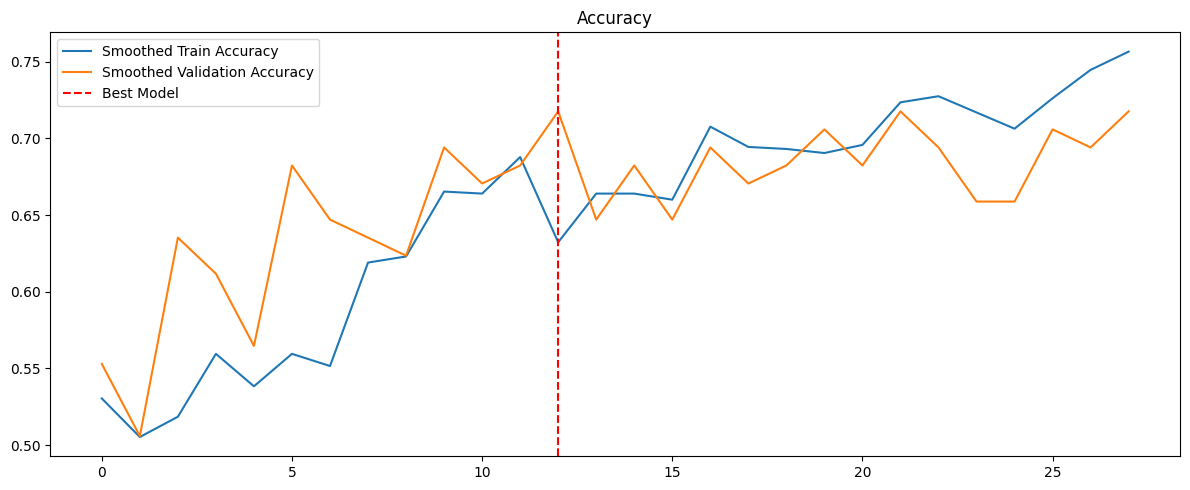

In [6]:
import matplotlib.pyplot as plt

# Extract values from the history 
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

def moving_average(data, window_size=3):
    """Computes the moving average of a list."""
    return [np.mean(data[max(0, i - window_size):i+1]) for i in range(len(data))]

window_size = 0
smooth_train_acc = moving_average(train_acc, window_size)
smooth_val_acc = moving_average(val_acc, window_size)
best_epoch = np.argmax(val_acc) 

plt.figure(figsize=(12, 5))

plt.subplot(1, 1, 1)
plt.plot(smooth_train_acc, label='Smoothed Train Accuracy')
plt.plot(smooth_val_acc, label='Smoothed Validation Accuracy')
plt.axvline(best_epoch, color='red', linestyle='--', label='Best Model')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

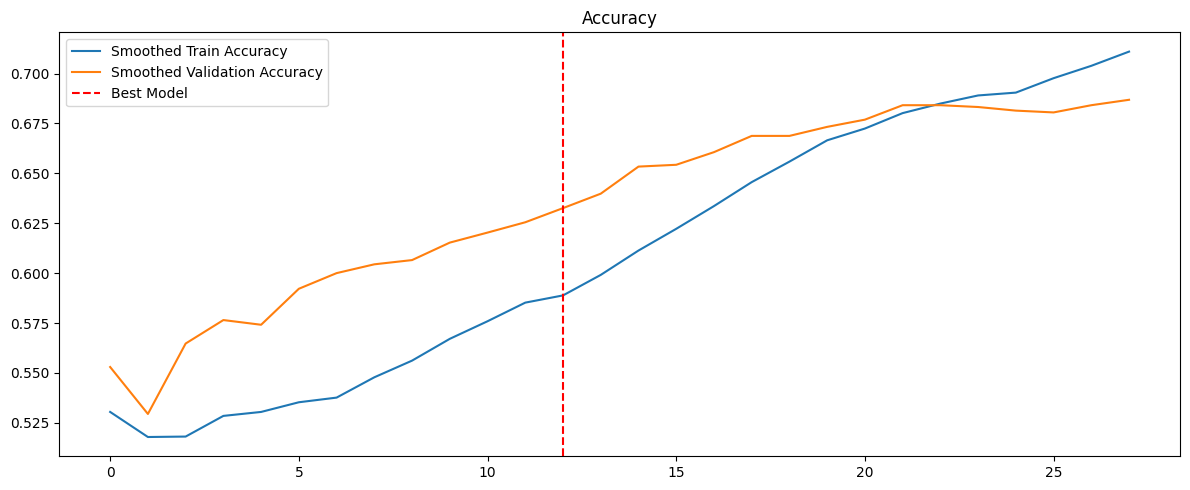

In [7]:
import matplotlib.pyplot as plt

# Extract values from the history 
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

def moving_average(data, window_size=3):
    """Computes the moving average of a list."""
    return [np.mean(data[max(0, i - window_size):i+1]) for i in range(len(data))]

window_size = 12
smooth_train_acc = moving_average(train_acc, window_size)
smooth_val_acc = moving_average(val_acc, window_size)
best_epoch = np.argmax(val_acc)  

plt.figure(figsize=(12, 5))

plt.subplot(1, 1, 1)
plt.plot(smooth_train_acc, label='Smoothed Train Accuracy')
plt.plot(smooth_val_acc, label='Smoothed Validation Accuracy')
plt.axvline(best_epoch, color='red', linestyle='--', label='Best Model')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()

#### Observation: Model is performing well. Let's check other models and conclude with best model

# Classical Models

In [4]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hyperparameter tuning for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['auto', 'scale']
}

clf_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy',n_jobs=-1)
clf_svm.fit(X_train, y_train)
y_pred_svm = clf_svm.predict(X_test)

# Print best parameters for SVM
print("Best Parameters for SVM:", clf_svm.best_params_)

# Metrics for SVM
print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

# Hyperparameter tuning for RF
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

clf_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy',n_jobs=-1)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

# Print best parameters for RF
print("\nBest Parameters for RF:", clf_rf.best_params_)

# Metrics for RF
print("RF Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Hyperparameter tuning for XGB
param_grid_xg = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

clf_xg = GridSearchCV(xgb.XGBClassifier(), param_grid_xg, cv=5, scoring='accuracy',n_jobs=-1)
clf_xg.fit(X_train, y_train)
y_pred_xg = clf_xg.predict(X_test)

# Print best parameters for XGB
print("\nBest Parameters for XGB:", clf_xg.best_params_)

# Metrics for XGB
print("XGB Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Precision:", precision_score(y_test, y_pred_xg))
print("Recall:", recall_score(y_test, y_pred_xg))
print("F1 Score:", f1_score(y_test, y_pred_xg))


Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Metrics:
Accuracy: 0.7219917012448133
Precision: 0.6666666666666666
Recall: 0.864406779661017
F1 Score: 0.7527675276752768

Best Parameters for RF: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
RF Metrics:
Accuracy: 0.6846473029045643
Precision: 0.6381578947368421
Recall: 0.8220338983050848
F1 Score: 0.7185185185185187

Best Parameters for XGB: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
XGB Metrics:
Accuracy: 0.6887966804979253
Precision: 0.656934306569343
Recall: 0.7627118644067796
F1 Score: 0.7058823529411764


#### Observation: SVM is performing well. Let's check for overfit and tune accordingly

In [8]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Using the best parameters to train the SVM model
best_params_svm = {'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}

svm_best = SVC(**best_params_svm)
X_train, X_test, y_train, y_test = train_test_split(text_scaled, labels, test_size=0.3, random_state=42)
svm_best.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred_best_svm = svm_best.predict(X_test)

# Calculate metrics for the best model
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
precision_best_svm = precision_score(y_test, y_pred_best_svm)
recall_best_svm = recall_score(y_test, y_pred_best_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm)

print("Best SVM Model Test Metrics:")
print("Accuracy:", accuracy_best_svm)
print("Precision:", precision_best_svm)
print("Recall:", recall_best_svm)
print("F1 Score:", f1_best_svm)


Best SVM Model Test Metrics:
Accuracy: 0.7423822714681441
Precision: 0.7085201793721974
Recall: 0.8494623655913979
F1 Score: 0.7726161369193154


In [9]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the train set using the best model
y_pred_best_svm = svm_best.predict(X_train)

# Calculate metrics for the best model
accuracy_best_svm = accuracy_score(y_train, y_pred_best_svm)
precision_best_svm = precision_score(y_train, y_pred_best_svm)
recall_best_svm = recall_score(y_train, y_pred_best_svm)
f1_best_svm = f1_score(y_train, y_pred_best_svm)

print("Best SVM Model Train Metrics:")
print("Accuracy:", accuracy_best_svm)
print("Precision:", precision_best_svm)
print("Recall:", recall_best_svm)
print("F1 Score:", f1_best_svm)


Best SVM Model Train Metrics:
Accuracy: 0.8394768133174791
Precision: 0.7811244979919679
Recall: 0.9373493975903614
F1 Score: 0.8521358159912377


#### Observation: There is slight overfit but lets finalize this model as no other parameter combination gives better results

# Saving SVM Model

In [10]:
import pickle

# Specify a path
model_filename = 'independant_text_model.pkl'

# Save the model to the file
with open(model_filename, 'wb') as model_file:
    pickle.dump(svm_best, model_file)
